# Observed Taylor law: variance vs mean 
**in the protein coding gene length distributions for the different species**

## Import python modules

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from plotnine import *

import sys
sys.path.append('../gl_lib/')
import gl_constants as c
import gl_plot as gl_p

## The protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the gene length's distributions

#### Statistical description 

In [2]:
# statistics on length distributions 
stat_file = c.STAT_G_FILE
print("The statistical descriptions of the protein coding gene distributions " + \
    "for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_both_dbs", "species", "count", "mean", "var", "log10_mean", "log10_var"]]

# visualize data
if 1:
    pd.set_option('display.max_columns', len(stat_df.columns))
    display(stat_df.sample(2))
    print(stat_df.shape)
    print(stat_df["division_both_dbs"].value_counts())

The statistical descriptions of the protein coding gene distributions for the different species is in:
 /home/emuro/git/github/borrador/main_work/../gl_lib/../main_tables/stat_protCodGenes.tsv 



,division_both_dbs,species,count,mean,var,log10_mean,log10_var
23162,bacteria,bacterium_336_3_gca_001281695,4027,968.169357,526967.259935,2.893630,0.077559
24113,bacteria,pseudomonas_sp_ok266_gca_900110195,5793,1001.781633,672621.789152,2.905776,0.082077


(33627, 7)
division_both_dbs
bacteria         30714
archaea           1229
fungi             1014
protists           237
vertebrates        222
invertebrates      115
plants              96
Name: count, dtype: int64


## Variance vs. mean (represented in $log_{10}$ scale)
### Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

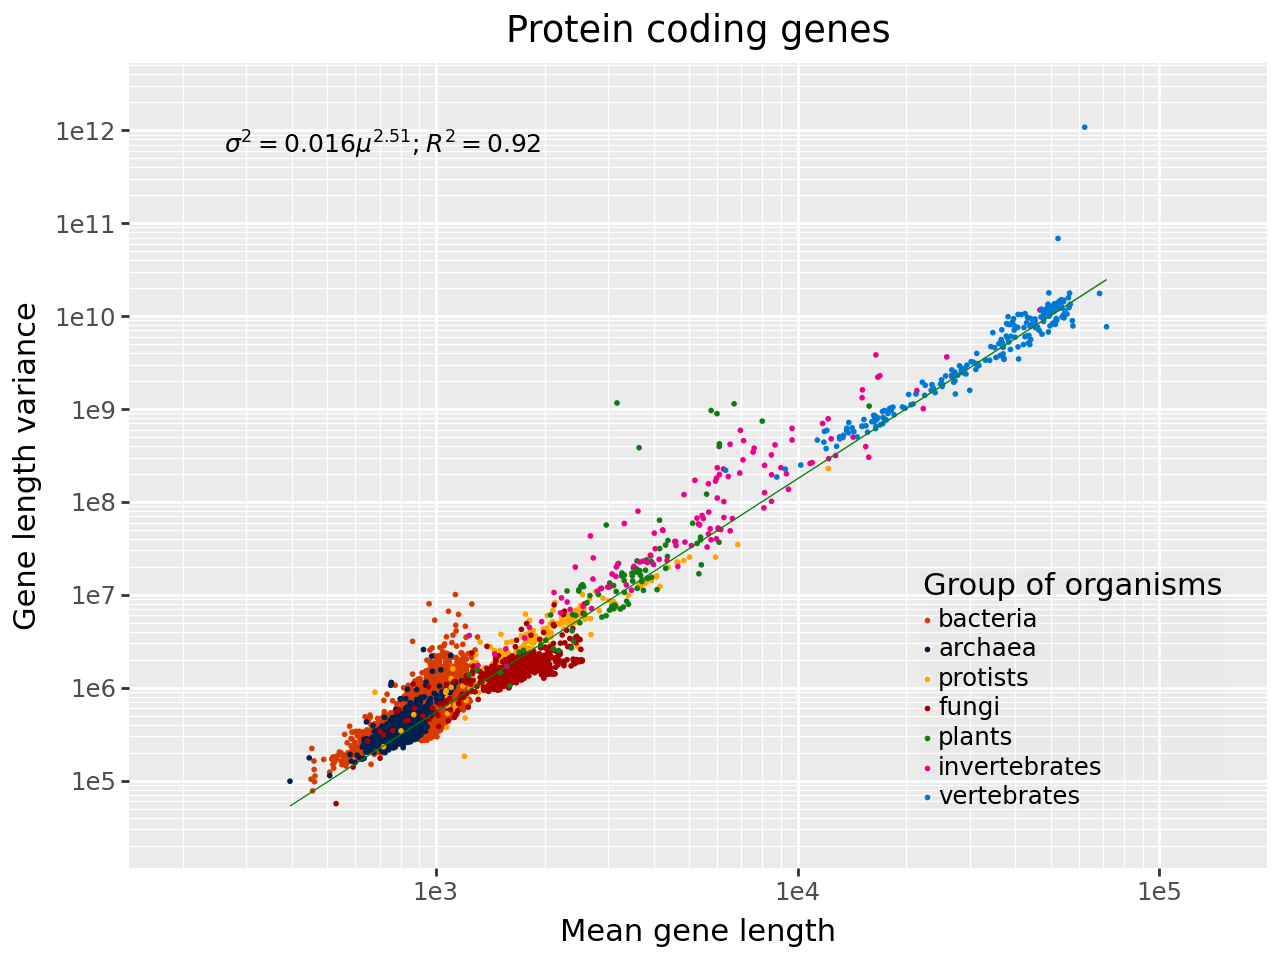

In [3]:
col_x = "mean"  
col_y = "var"  
legends_by = "division_both_dbs"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = stat_df
if 0:
    print(df2plot.shape)

# Sort division_both_dbs in order to plot the color of the clades in order
if 0:
    print(df2plot.division_both_dbs.unique())
df2plot.division_both_dbs = pd.Categorical(df2plot.division_both_dbs, 
                                categories=c.ORG_GROUPS,           
                                ordered=True)
df2plot.sort_values('division_both_dbs', inplace=True)

gl_p.plot_taylor_genes(df2plot, col_x, col_y, x_lab, y_lab, title, legends_by, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $